In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#!pip install netCDF4
from netCDF4 import Dataset as NetCDFFile
import random
import timeit
import pickle
from scipy import stats
import xarray as xr
import pandas as pd
import statistics
from scipy import interpolate
import os
import pytz, datetime
import multiprocessing as mp
import geopandas
#!pip install descartes
import descartes
from datetime import date

from datetime import datetime

now = datetime.now()

current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

import geopandas
from importlib import reload

# from google.colab import drive
# drive.mount('/content/drive')

Current Time = 03/07/24:15:22:39


In [5]:
!pwd

/Users/kaichiht/Library/CloudStorage/GoogleDrive-kuiper2000@gmail.com/My Drive/Colab/2021_research/tornado_data/Manuscript/seasonal_forecast_Github


In [7]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


# load maps
import sys
#del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1995, end_year = 2017,colab=False)
states, costal_lat, costal_lon           = data._maps()
lon, lat                                 = data._lat_lon(sst=True)

# load tornado data
tornado_month                            = data._tornado()

# load observed sst data
sst, sst_anomaly                         = data._data_sst()
sst_obs_dim                              = np.shape(sst)

# load land sea mask
land_sea_mask                            = data._data_landsea_mask(mask_type=[False,True,False])

# load observed sst data
sst_model, sst_ens                       = data._data_sst(obs=False)
sst_model_dim                            = np.shape(sst_model)

Current Time = 03/07/24:16:52:53
working on SST data
type 1 = sst, type 2 = tornado, type 3 = atmosphere, input example = [True,False,False]
working on SST data
01
02
03
04
05
06
07
08
09
10
11
12
return ensemble mean sst
dim = (init_month,step(month),lat,lon)


In [8]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# calculate NINO34 index
from domain_calculation import domain_calculation
domain_calculation                       = domain_calculation(sst_anomaly,lat,lon,[-5,5,190,240])
NINO34_obs                               = domain_calculation._domain_average()
NINO34_obs                               = np.reshape(NINO34_obs,[np.size(NINO34_obs),1])
NINO34_obs                               = (NINO34_obs-np.mean(NINO34_obs))/np.std(NINO34_obs)

from domain_calculation import domain_calculation
sst_model                                = np.reshape(sst_model,[sst_model_dim[0]*sst_model_dim[1],sst_model_dim[2],sst_model_dim[3]])
domain_calculation                       = domain_calculation(sst_model,lat,lon,[-5,5,190,240])
NINO34                                   = domain_calculation._domain_average()
NINO34                                   = np.reshape(NINO34,[sst_model_dim[0],sst_model_dim[1]])
NINO34                                   = np.reshape(NINO34,[12,23,12])

Current Time = 03/07/24:21:37:30


In [9]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# calculate ENSO regression maps
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(NINO34_obs,sst_anomaly,0,0)
coef                                     = Regression_wise._linear_regression()

Current Time = 03/07/24:21:37:47
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
(1, 276)
(360, 576, 276)


In [10]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)


# calculate ENSO scores
#import sys
#del sys.modules["Prediction_wise"]

from Prediction_wise import Prediction_wise

Prediction_wise  = Prediction_wise(NINO34_obs, NINO34, obs_init='1995-01', obs_final='2018-1', obs_interval='1m', model_init='1995-01', model_final='2019-12', model_init_freq='12m',total_forecast_lead=12)
score            = Prediction_wise._prediction_eval()


Current Time = 03/07/24:21:38:07


In [11]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# strat from here
from Regression_wise import Regression_wise
NINO34_obs                               = np.reshape(NINO34_obs,[23,12])
Regression_wise                          = Regression_wise(NINO34_obs[:,2:3],tornado_month[3:26],0,0)
PPH_NINO34                               = Regression_wise._linear_regression()


#import sys
#del sys.modules["Regression_wise"]
from Regression_wise import Regression_wise
Regression_wise                          = Regression_wise(tornado_month[3:26],NINO34_obs[:,2:3],0,0)
reg_coef                                 = Regression_wise._corrcoef()


Current Time = 03/07/24:22:19:21
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression
(1, 23)
(23, 61, 23)
input: data1, data2, dim1 = the dimension of data1 used for regression, dim2 = the dimension of data2 used for regression


/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/Shared/miniconda3/envs/jupyterlab-git/lib/python3.9/site-package

# FIG1

Current Time = 03/07/24:22:20:29
Today's date: 2024-03-07


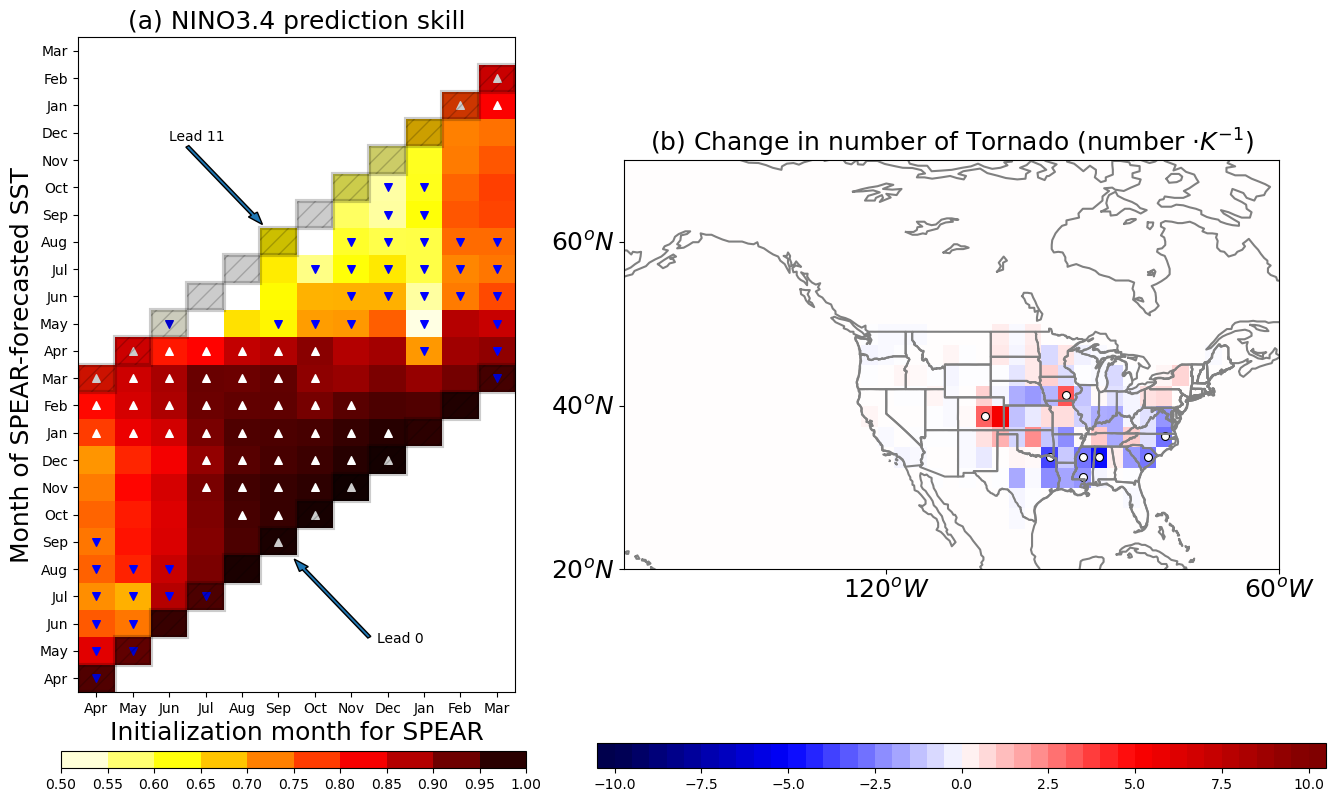

In [13]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

#lon, lat                                 = data._lat_lon(tornado=True)
import sys
del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1995, end_year = 2017, colab=False)
lon, lat                                 = data._lat_lon(tornado=True)

import sys
#del sys.modules["Tile_plot"]
from Tile_plot import making_tile
making_tile                              = making_tile(score)
score_map_NINO34, score_map_NINO34_upper, score_map_NINO34_lower,score_map_anomaly_NINO34,target_month_map = making_tile._tile_plot()


# plot Figure 1
today = date.today()
print("Today's date:", today)



my_map   = 'hot_r'
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 3]})
cs1      = axs[0].pcolormesh(score_map_NINO34,vmin=0.505,vmax=1,cmap=my_map)
axs[0].set_xticks(np.arange(0.5,13,1), minor=False)
axs[0].set_xticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                                'Dec','Jan','Feb','Mar','Apr'], fontdict=None, minor=False)
axs[0].set_yticks(np.arange(0.5,24,1), minor=False)
axs[0].set_yticklabels(['Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov',\
                                'Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov','Dec','Jan','Feb','Mar'], fontdict=None, minor=False)
axs[0].set_ylim([0,24])
axs[0].set_xlabel('Initialization month for SPEAR',fontsize=18)
axs[0].set_ylabel('Month of SPEAR-forecasted SST',fontsize=18)

posi_x, posi_y = np.where((score_map_NINO34.T>score_map_NINO34_upper.T) & (score_map_NINO34.T>0.505))
axs[0].scatter(posi_x+0.5,posi_y+0.5,30,'w','^')
axs[0].scatter(posi_x+0.5,posi_y+0.5,8,'w','^')

posi_x, posi_y = np.where((score_map_NINO34.T<score_map_NINO34_lower.T) & (score_map_NINO34.T>0.505))
axs[0].scatter(posi_x+0.5,posi_y+0.5,30,'b','v')
axs[0].scatter(posi_x+0.5,posi_y+0.5,8,'b','v')

for j in range(12):
    x1 = [j,j+1,j+1,j]
    y1 = [j,j,j+1,j+1]
    axs[0].fill(y1,x1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
axs[0].arrow(8, 2, -1.8, 2.5, width = 0.1)
axs[0].text(8.2, 1.8, 'Lead 0')
for j in range(12):
    x1 = [j+11,j+1+11,j+1+11,j+11]
    y1 = [j,j,j+1,j+1]
    axs[0].fill(y1,x1 , facecolor="k",edgecolor='k',hatch='//',alpha=0.2,linewidth=3)
axs[0].arrow(3, 18+2, 1.8, -2.5, width = 0.1)
axs[0].text(2.5, 18.2+2, 'Lead 11')
axs[0].set_title('(a) NINO3.4 prediction skill',fontsize=18)





states.boundary.plot(color='gray',ax=axs[1])
cs2     = axs[1].pcolor(lon-360,lat+1.25,PPH_NINO34*land_sea_mask,vmin=-10,vmax=10,cmap='seismic')
posi_x, posi_y = np.where((reg_coef*land_sea_mask>=0.3) & (np.abs(PPH_NINO34)>1.5))
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,30,'k','o')
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,15,'w','o')

posi_x, posi_y = np.where((reg_coef*land_sea_mask<=-0.3) & (np.abs(PPH_NINO34)>1.5))
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,30,'k','o')
axs[1].scatter(lon[posi_x,posi_y]-360,lat[posi_x,posi_y]+1.25,15,'w','o')

axs[1].set_title(r'(b) Change in number of Tornado (number $\cdot K^{-1}$)',fontsize=18)
axs[1].plot(costal_lon-360,costal_lat,'gray')
axs[1].set_xticks([0-360, 60-360, 120-360, 180-360,240-360,300-360,360-360], minor=False)
axs[1].set_xticklabels(['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'], fontdict=None, minor=False,fontsize=18)
axs[1].set_yticks([-80,-60,-40,-20,0, 20,40,60,80], minor=False)
axs[1].set_yticklabels(['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'], fontdict=None, minor=False,fontsize=18)
axs[1].set_xlim([200-360,300-360])
axs[1].set_ylim([20,70])


fig.set_size_inches(15.5,8.5)
cbar_ax = fig.add_axes([0.114, 0.02, 0.3,0.02])
cbar    = fig.colorbar(cs1, cax=cbar_ax, orientation='horizontal',boundaries=np.arange(0.5,1.05,0.05), ticks=np.arange(0.5,1.05,0.05))

cbar_ax = fig.add_axes([0.46, 0.02, 0.47,0.03])
cbar    = fig.colorbar(cs2, cax=cbar_ax, orientation='horizontal',boundaries=np.arange(-10.5,11,0.5))


# FIG2 starts from here

In [1]:
# reload SST data
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%D:%H:%M:%S")
print("Current Time =", current_time)

# load maps
import sys
del sys.modules["import_data"]
from import_data import tornado_data
data                                     = tornado_data(start_year = 1992, end_year = 2021,colab=False)
states, costal_lat, costal_lon           = data._maps()
lon, lat                                 = data._lat_lon(sst=True)

# load tornado data
tornado_month                            = data._tornado()

# load land sea mask
land_sea_mask                            = data._data_landsea_mask(mask_type=[False,True,False])

# load observed sst data
sst_model,sst_ens                        = data._data_sst(obs=False)
sst_model_dim                            = np.shape(sst_model)
del sst_ens

Current Time = 03/07/24:22:31:56


KeyError: 'import_data'